In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analyzing

In [115]:
print("Air Quality and Air Pollution Analysis")
print("------------------------")
print('Summary:\n\tAnalyzing the air quality data over time and across locations to understand pollution trends, major pollutants, and seasonal variations.')

Air Quality and Air Pollution Analysis
------------------------
Summary:
	Analyzing the air quality data over time and across locations to understand pollution trends, major pollutants, and seasonal variations.


In [116]:
df=pd.read_csv(r'D:\DataSets\city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [117]:
print(f"Information Of This Dataset:\n")
df.info()

Information Of This Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [118]:
print(f"\nMissing Values In This Dataset:\n")
for i in df.isnull().sum():
    print(i)


Missing Values In This Dataset:

0
0
4598
11140
3582
3585
4185
10328
2059
3854
4022
5623
8041
18109
4681
4681


In [138]:
columns=[]
for i in df.columns:
    columns.append(i)
print(f"Columns in this Dataset:{len(columns)} Columns\n",columns)

Columns in this Dataset:19 Columns
 ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'year', 'month', 'Day']


In [139]:
cities=[]
for i in df['City'].unique():
    cities.append(i)
    
print(f'Name of cities:\n{cities}')

Name of cities:
['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']


In [140]:
num_columns=[]
for i in df.describe().columns:
    num_columns.append(i)
print(f"Numerical Columns in this Dataset:{len(columns)} Columns\n",columns)

Numerical Columns in this Dataset:19 Columns
 ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'year', 'month', 'Day']


In [19]:
values=[]
for i in df['AQI_Bucket'].unique():
    values.append(i)
print(f'AQI Categories:\n{values}')

AQI Categories:
[nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good']


In [129]:
# Show the percentage of missing values in each column
missing_percentage=df.isnull().mean()*100
print(f"Pecentage of Missing Values:\n{missing_percentage.sort_values(ascending=False)}")

Pecentage of Missing Values:
Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI_Bucket    15.851139
AQI           15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
year           0.000000
month          0.000000
Day            0.000000
dtype: float64


In [130]:
# Removed Duplicates 
df=df.drop_duplicates()
print("After Removing Duplicates, the shape is:",df.shape)

After Removing Duplicates, the shape is: (29531, 19)


In [131]:
# Drop rows with missing 'City' or 'Date'
df=df.dropna(subset=['City','Date'])

In [132]:
# Convert 'Date' to datetime and extract year, month, day in seperate column.
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day


## Data Cleaning:

In [133]:
# Missing percentage is above 30 percentage need drop that column.
# If In case the high missing column is very important, we can fill values by using groupby based on related column.

missing_values = df.isnull().mean()*100
High_missing_columns = missing_value[missing_values>30].index
Low_missing_column = missing_value[missing_values<30].index
Low_missing_column = [col for col in Low_missing_column if df[col].dtypes=="float" or df[col].dtypes=="int"]

In [142]:
# Validating the missing values columns which is skewed distribution or normal distribution:
# The value is above 0 or below 0 which is skewed distibution otherwise it is normal distribution.
# Both missing columns are skewed distributed column so we can fill with median values. 
column = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']
for col in column:
    print(f"{col}: {round(df[col].skew(),2)}")

PM2.5: 3.37
PM10: 2.05
NO: 3.88
NO2: 2.46
NOx: 2.57
NH3: 4.08
CO: 8.88
SO2: 4.08
O3: 1.33
Benzene: 21.3
Toluene: 11.67
AQI: 3.4


In [143]:
# Filling missing value which are below 30 percentage columns and also skewed distributed columns.
for col in Low_missing_column:
    df[col] = df[col].fillna(df[col].median())

In [144]:
# Validate the values are filled properly
df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10          11140
NO                0
NO2               0
NOx               0
NH3           10328
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene        18109
AQI               0
AQI_Bucket     4681
year              0
month             0
Day               0
dtype: int64

In [145]:
# Filling the high missing values columns using groupby based on city column.
for col in High_missing_columns:
    df[col] = df.groupby("City")[col].transform(lambda x:x.fillna(x.median()))
    df[col] = df[col].fillna(df[col].median())

In [146]:
# Again Validate the values are filled properly
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
year             0
month            0
Day              0
dtype: int64

In [147]:
# Filling missing values in categorical column:
def assign_values(aqi):
    if aqi<=50:
        return "Good"
    elif aqi<=100:
        return "Moderate"
    elif aqi<=200:
        return "Satisfactory"
    elif aqi<=300:
        return "Poor"
    elif aqi<=400:
        return "Very Poor"
    else: 
        return "Severe"

df.loc[df["AQI_Bucket"].isnull(),"AQI_Bucket"] = df.loc[df["AQI_Bucket"].isnull(),"AQI"].apply(assign_values)

In [148]:
# For Once again is there any null values.
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
year          0
month         0
Day           0
dtype: int64

In [149]:
# This 'Xylene' column has highly missing values so we can't do any analysis because not enough data to fill missing values.
df.drop("Xylene",axis=1,inplace=True)

In [150]:
start=df['Date'].min()
end=df['Date'].max()

print(f"Date Range Start from {start.date()} to {end.date()}")

Date Range Start from 2015-01-01 to 2020-07-01


In [151]:
# Deducting outliers 
for col in column:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col]>upper_bound) | (df[col]<lower_bound)]
    print(len(outliers))

2736
2095
3199
1743
2629
1631
2747
3154
1181
2646
3915
3192


In [153]:
for col in column:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col]>upper_bound) | (df[col]<lower_bound)]
    df[col] = df[col].clip(lower=lower_bound,upper=upper_bound)
    print(len(outliers))

0
0
0
0
0
0
0
0
0
0
0
0


## Exploratory EDA Analysis.


Distribution Of various pollutions

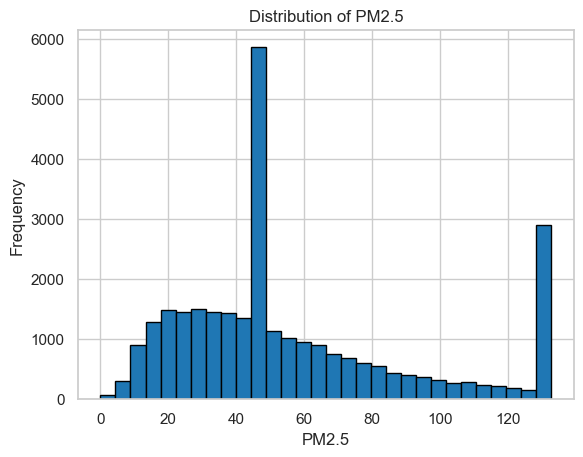

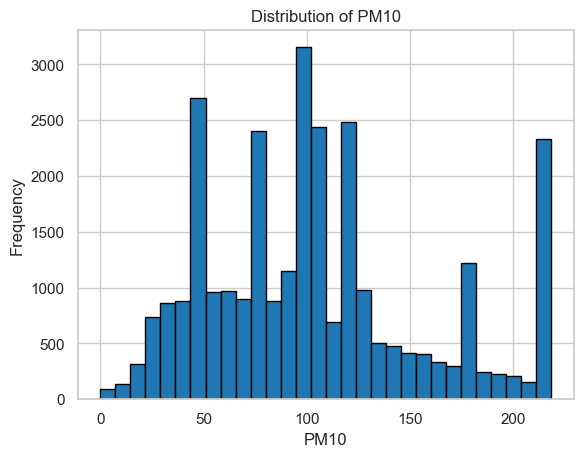

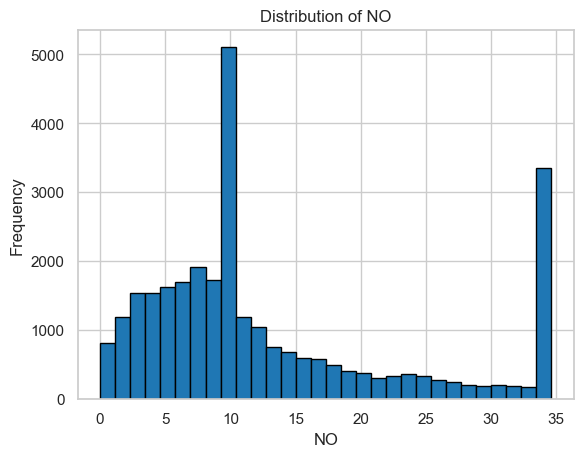

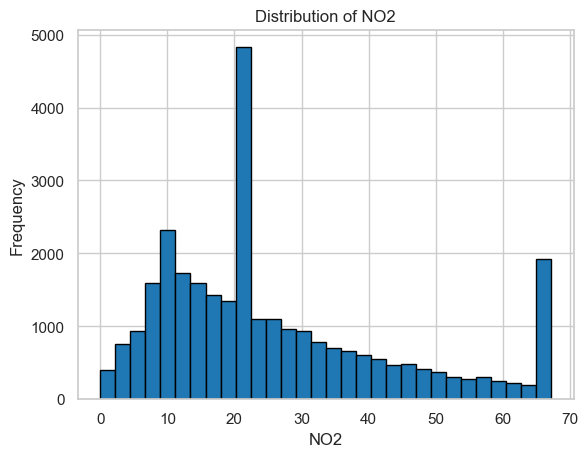

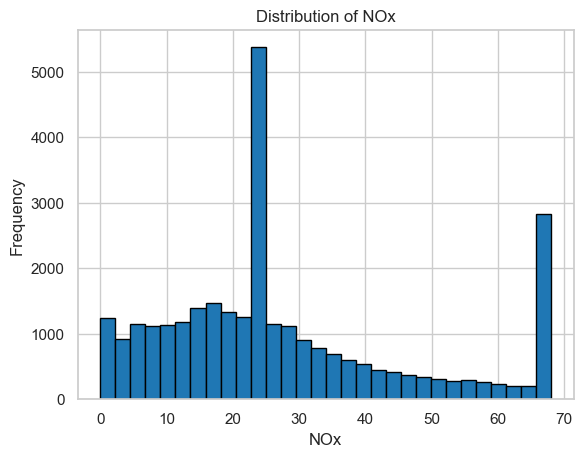

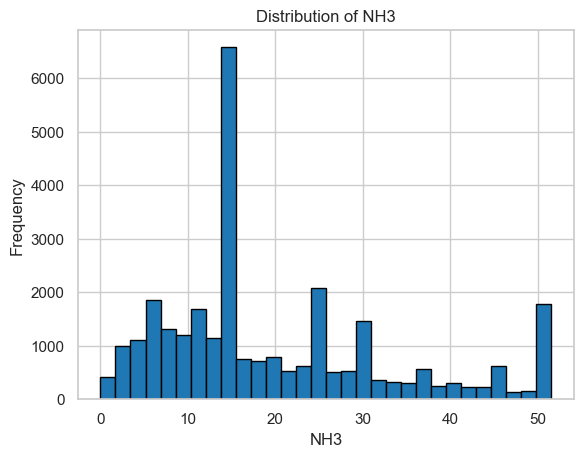

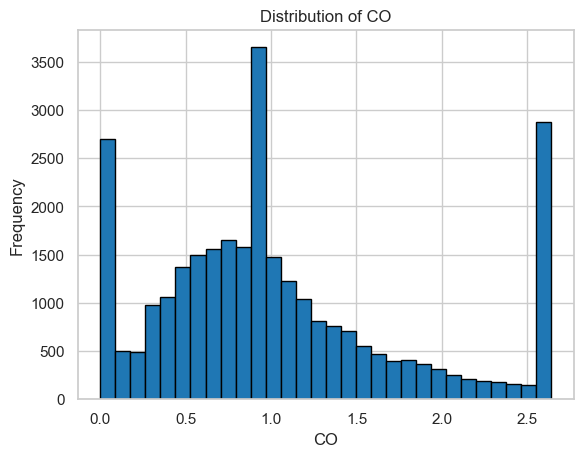

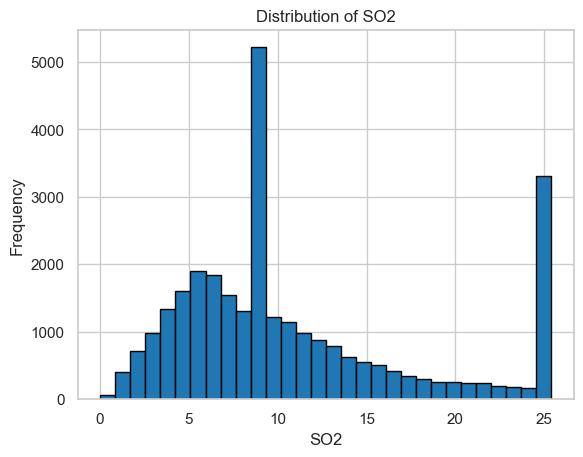

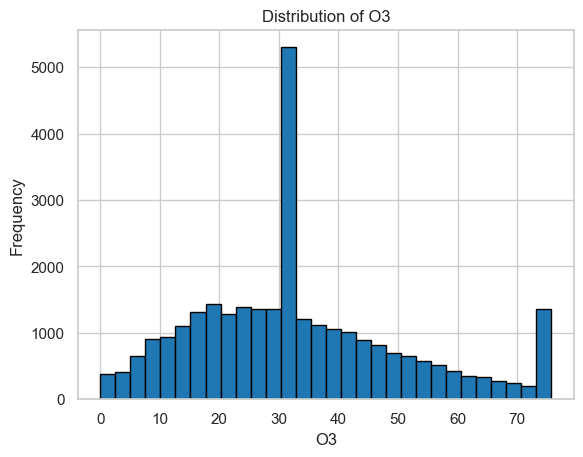

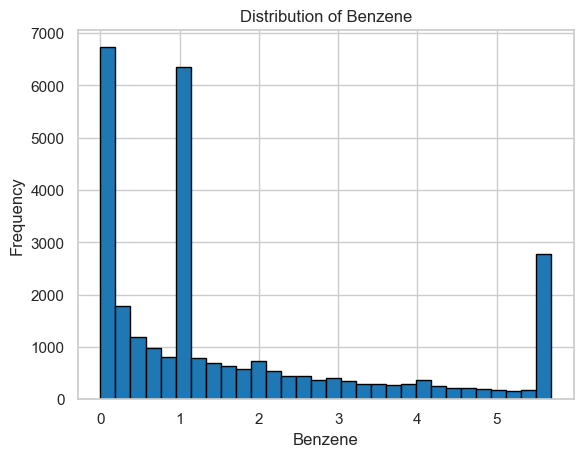

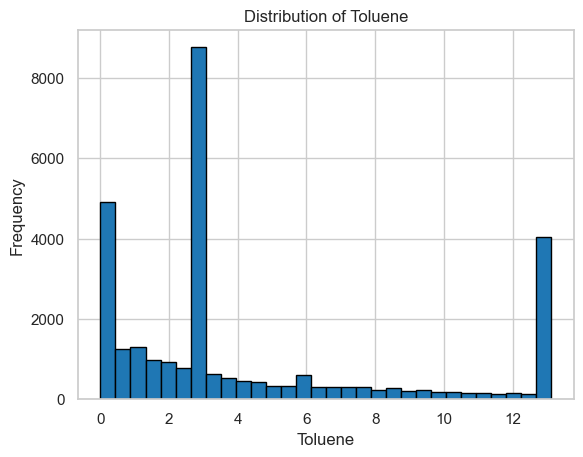

Notes:Distribution for pollutions columns


In [155]:
pollutions = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene']

for i in pollutions:
    plt.hist(df[i],bins=30,edgecolor='black')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

print("Notes:Distribution for pollutions columns")

Distribution of years

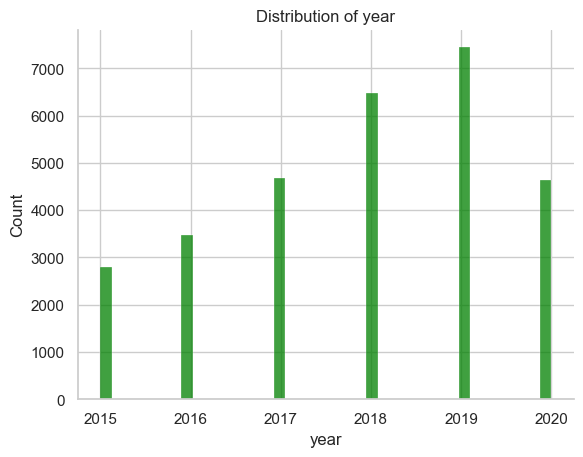

In [156]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.histplot(data=df,x="year",color='green',linewidth=0.2)
plt.title("Distribution of year")
sns.despine()

In [157]:
print("\nNote: Distribution are right skewed.Distribution of years gradutally increasing from 2025 to 2019 after 2020 get down due to covid lockdown period")


Note: Distribution are right skewed.Distribution of years gradutally increasing from 2025 to 2019 after 2020 get down due to covid lockdown period


Average Pollutions Level

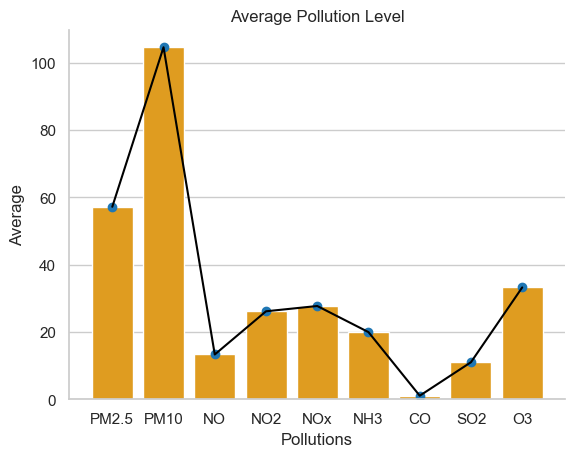

In [158]:
columns=["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3"]
values=[]
for i in columns:
    s=df[i].mean()
    values.append(s)

sns.barplot(x=columns,y=values,color='orange')
plt.plot(columns,values,color='black')
plt.scatter(columns,values)
plt.title("Average Pollution Level")
plt.xlabel("Pollutions")
plt.ylabel("Average")
sns.despine()

In [47]:
print('\nNote: Both PM10 and PM2.5 participates highest pollution level. NO2,NOx,NH3 and O3 mid-level not too high and not too low.NO contribution lower pollution and CO contributing too low pollution.')


Note: Both PM10 and PM2.5 participates highest pollution level. NO2,NOx,NH3 and O3 mid-level not too high and not too low.NO contribution lower pollution and CO contributing too low pollution.


Average Pollution levels By city.

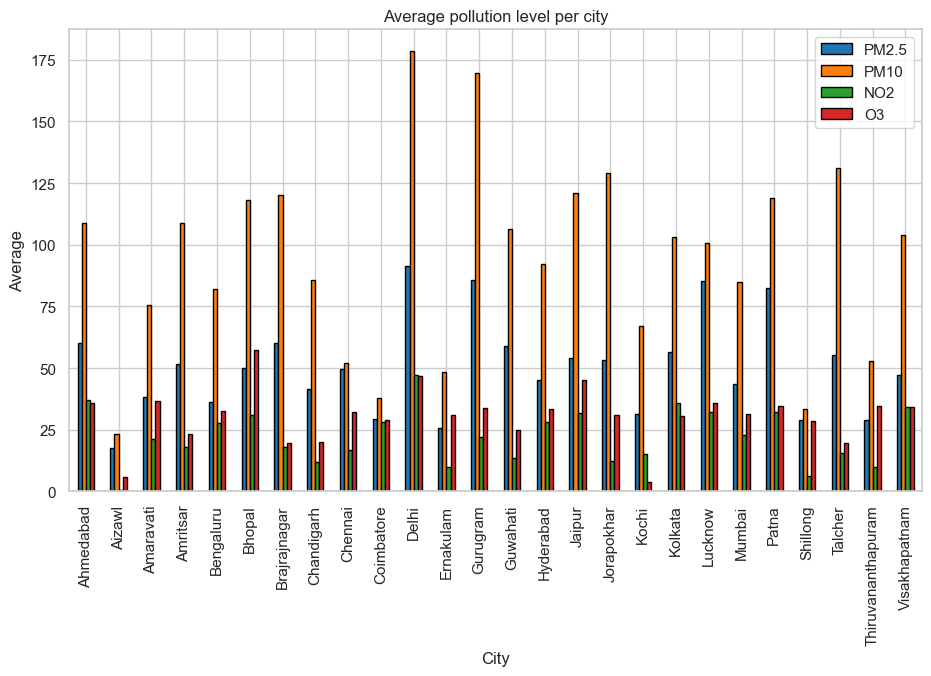

Notes:Cities like Delhi,Gurugram,Talcher and Jorapokhar Highest PM10 followed by PM2.5.In PM10 particulate matter 10 micrometers has high average pollution contribute in entire cities and PM2.5 particulate matter PM2.5 micrometers contribute in overall cities ,Delhi got 1st place in plollutions and others are not contribute major pollution.


In [160]:
df.groupby("City")[['PM2.5','PM10','NO2','O3']].mean().plot(kind='bar',figsize=(11,6),edgecolor='black')
plt.title('Average pollution level per city')
plt.xlabel('City',fontsize=12)
plt.ylabel('Average',fontsize=12)
plt.legend(fontsize=11)
plt.grid(True)
plt.show()

print('Notes:Cities like Delhi,Gurugram,Talcher and Jorapokhar Highest PM10 followed by PM2.5.In PM10 particulate matter 10 micrometers has high average pollution contribute in entire cities and PM2.5 particulate matter PM2.5 micrometers contribute in overall cities ,Delhi got 1st place in plollutions and others are not contribute major pollution.')

Average PM2.5 level per month of every year.

which month has the highest average concentration for each pollutants.

In [216]:
pol=['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
a=df.groupby('month')[pol].mean()

for i in pol:
    b=a[str(i)].sort_values(ascending=False).reset_index().iloc[0]
    print(f"{b['month'].astype('int')}th month has the highest average {i} concentration: {b[i]:.2f}")

print('\nNotes:Air pollution like PM2.5,PM10,NO2,SO2 are highest pollution concentrate on November and December month however some of few like CO and O3 only on Janurary and May.')

12th month has the highest average PM2.5 concentration: 80.24
1th month has the highest average PM10 concentration: 126.78
12th month has the highest average NO2 concentration: 33.47
1th month has the highest average SO2 concentration: 12.41
12th month has the highest average CO concentration: 1.25
5th month has the highest average O3 concentration: 37.59

Notes:Air pollution like PM2.5,PM10,NO2,SO2 are highest pollution concentrate on November and December month however some of few like CO and O3 only on Janurary and May.


Pollution changed over time (yearly trend).

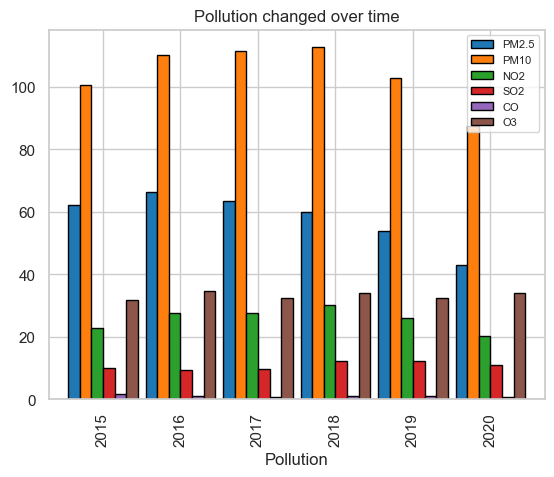

Analysing pollution changed overby year trend.Pollution continously get increase from 2015 to 2018,after 2018 pollution becoming control from 2019 and 2020 PM2.5 and PM10 contibute majority of pollution


In [162]:
df.groupby('year')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].mean().plot(kind='bar',edgecolor='black',linewidth=1,width=0.9)
plt.title('Pollution changed over time')
plt.xlabel('Pollution')
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

print('Analysing pollution changed overby year trend.Pollution continously get increase from 2015 to 2018,after 2018 pollution becoming control from 2019 and 2020 PM2.5 and PM10 contibute majority of pollution')

Correlation between PM2.5 and PM10 or NO2

correlation between PM2.5 and PM10 or NO2



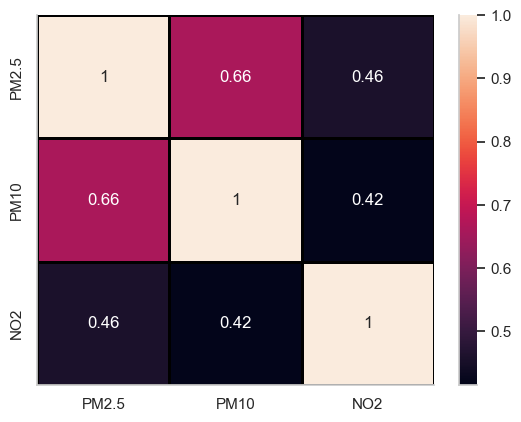

In [163]:
col=['PM2.5','PM10','NO2']

corr=sns.heatmap(data=df[col].corr(),annot=True,linewidths=2,linecolor='black',color='violet')
sns.despine()
print('correlation between PM2.5 and PM10 or NO2\n')

In [164]:
print('\nNotes: The analysis shows that PM2.5 and PM10 are moderately correlated, indicating they may originate from similar pollution sources (e.g., vehicular emissions, dust).\nHowever, NO2 has a weaker correlation, meaning its variation might be influenced by different factors (like combustion from engines or industrial processes).')


Notes: The analysis shows that PM2.5 and PM10 are moderately correlated, indicating they may originate from similar pollution sources (e.g., vehicular emissions, dust).
However, NO2 has a weaker correlation, meaning its variation might be influenced by different factors (like combustion from engines or industrial processes).


AQI Category Distribution

Distribution of AQI Category


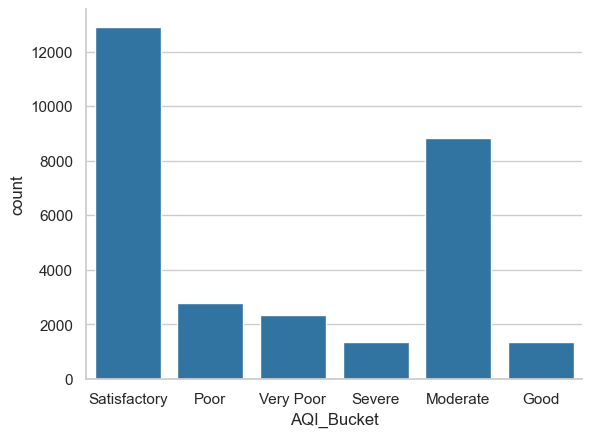

In [165]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='AQI_Bucket')
sns.despine()
print('Distribution of AQI Category')

In [166]:
print('\nNote:Most of the AQI falls in Modearte and Satisfactory indicates average air quality in most of the cities however Only few cities are poor,very poor,good even severe concenterates good air quality and some cities are not yet to get reviews.')


Note:Most of the AQI falls in Modearte and Satisfactory indicates average air quality in most of the cities however Only few cities are poor,very poor,good even severe concenterates good air quality and some cities are not yet to get reviews.


Analaysis Relationship between PM2.5 and PM10

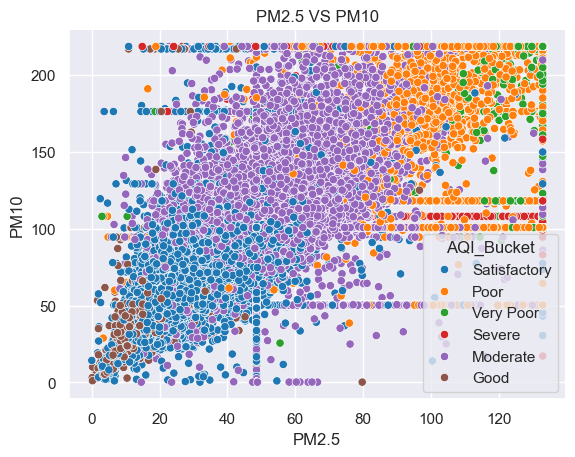

In [167]:
sns.set_style('darkgrid')
sns.set_context('notebook')
hist=sns.scatterplot(x=df['PM2.5'],y=df['PM10'],hue=df['AQI_Bucket'])
hist.set_title("PM2.5 VS PM10")
sns.despine()

In [168]:
print("\nNotes:The Relationship between PM2.5 and PM10 pollution most AQI categories are Moderate,Satisfactory,Poor and Very poor participates in both however Severe concentrate on PM10 pollution.")


Notes:The Relationship between PM2.5 and PM10 pollution most AQI categories are Moderate,Satisfactory,Poor and Very poor participates in both however Severe concentrate on PM10 pollution.


AQI Catogery Treand over the year


AQI Catageory Distribution over year


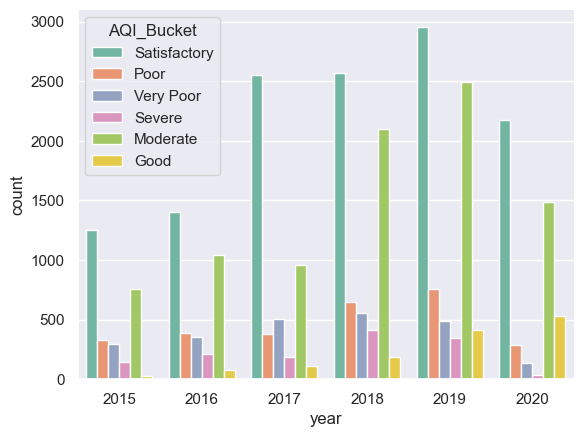

In [169]:
sns.countplot(data=df,x="year",hue="AQI_Bucket",palette='Set2')
sns.despine()
print('\nAQI Catageory Distribution over year')

In [170]:
print("\nNote:The number of air quality records increased steadily from 2015 to 2019, peaking in 2019 before dropping in 2020. Moderate and Satisfactory categories dominate most years, but Poor, Very Poor, and Severe also rise notably after 2017. In 2020, there's a visible improvement, possibly due to reduced activity during COVID-19 lockdowns")


Note:The number of air quality records increased steadily from 2015 to 2019, peaking in 2019 before dropping in 2020. Moderate and Satisfactory categories dominate most years, but Poor, Very Poor, and Severe also rise notably after 2017. In 2020, there's a visible improvement, possibly due to reduced activity during COVID-19 lockdowns


Maximum Pollutant Concentrations Recorded by City

In [200]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
result=[]
for i in pollutants:
    id=df[i].idxmax()
    detail=df.iloc[id]
    result.append({
        'Pollution':i,
        'City':detail['City'],
        'Date':detail['Date'],
        'Max_Value':detail[i]
    })

Dataframe=pd.DataFrame(result)
print(Dataframe)

print("\nSome pollutants have reached extremely high levels, such as PM10 at 1000 in Guwahati and PM2.5 at 950 in Gurugram, indicating hazardous air conditions. Mumbai, Delhi, and Shillong also report alarming spikes in gases like NOx, SO2, O₃, Benzene, and Toluene, far above safe exposure limits.")

   Pollution       City       Date  Max_Value
0      PM2.5  Ahmedabad 2015-02-01   132.9000
1       PM10  Ahmedabad 2019-10-13   218.3750
2         NO  Ahmedabad 2015-01-06    34.6100
3        NO2  Ahmedabad 2017-11-03    67.1925
4        NOx  Ahmedabad 2015-01-06    68.0325
5        NH3   Amritsar 2017-10-08    51.5200
6         CO  Ahmedabad 2015-01-03     2.6400
7        SO2  Ahmedabad 2015-01-01    25.3900
8         O3  Ahmedabad 2015-01-01    75.7150
9    Benzene  Ahmedabad 2015-01-03     5.6900
10   Toluene  Ahmedabad 2015-01-03    13.1300

Some pollutants have reached extremely high levels, such as PM10 at 1000 in Guwahati and PM2.5 at 950 in Gurugram, indicating hazardous air conditions. Mumbai, Delhi, and Shillong also report alarming spikes in gases like NOx, SO2, O₃, Benzene, and Toluene, far above safe exposure limits.


In [174]:
# Exporting Cleaned dataset into CSV file.
df.to_csv('Cleaned_Air_Pollution_Dataset.csv',index=False)